In [1]:
import pandas  as pd
import numpy  as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.io.shapereader import Reader
import matplotlib.ticker as mticker
import cmocean
import geopandas as gpd
#from shapely.geometry import
from scipy.interpolate import Rbf
import xarray as xr
#import matplotlib.pylab as plt
%matplotlib inline

In [2]:
# Load the border data, CN-border-La.dat is downloaded from
# http://gmt-china.org/datas/CN-border-La.dat
with open('/public/home/hysplit/data/map/CN-border-La.dat') as src:
    context = src.read()
    blocks = [cnt for cnt in context.split('>') if len(cnt) > 0]
    borders = [np.fromstring(block, dtype=float, sep=' ') for block in blocks]

In [3]:
def plotMap_contour(lat,lon,pre,year):
    olon = np.linspace(73,135,500)
    olat = np.linspace(10,55,500)
    olon,olat = np.meshgrid(olon,olat)
    # add borders, coastline, rivers, lakes, and provinces of China
    proj = ccrs.PlateCarree()
    # Set figure size
    fig = plt.figure(figsize=[10, 8])
    # Set projection and plot the main figure
    ax = plt.axes(projection=proj)
    #ax.background_img(name='BM', resolution='high')
    #Zoom in
    ax.set_extent([73, 135, 10, 55])
    # Plot border lines
    for line in borders:
        ax.plot(line[0::2], line[1::2], '-', color='gray',
            transform=ccrs.Geodetic())
    # Plot gridlines
    ax.gridlines(linestyle='--')
    #Add map features
    ax.add_feature(cfeature.LAND, facecolor='0.99') #Grayscale colors can be set using 0 (black) to 1 (white)
    ax.add_feature(cfeature.LAKES, alpha=0.9)  #Alpha sets transparency (0 is transparent, 1 is solid)
    ax.add_feature(cfeature.COASTLINE.with_scale('50m'), zorder=10, linestyle=':') # mediate resolution
    ax.add_feature(cfeature.RIVERS) # low resolution
    newcmap = cmocean.tools.crop_by_percent(cmocean.cm.rain, 10, which='both', N=None)
    ##x, y, z = lon, lat, ci
    #zi = griddata((x, y), z, (matrixLon,matrixLat),method='nearest')
    v = np.linspace(0.0, 1.5, 16, endpoint=True)
    #levels=[0.2,0.3,0.4,0.5,0.6,0.7,0.8]
    contour=plt.contourf(lon,lat,pre,levels=v,
             transform=ccrs.PlateCarree(),cmap=newcmap,zorder=0,extend="max")
    #ci.plot.pcolormesh(ax=ax)
    #clip=maskout.shp2clip(contour,ax,'/public/home/hysplit/software/MeteoInfo/map/country',"China")
    plt.colorbar(label=r'Precipation',fraction=0.040, pad=0.04)
    #plt.clim(0.0,2.0)
# make legend with dummy points
    #plt.title(year+"", fontsize=20)
    sub_ax = fig.add_axes([0.701, 0.18, 0.14, 0.155],projection=proj)
    # Add ocean, land, rivers and lakes
    sub_ax.add_feature(cfeature.OCEAN)
    sub_ax.add_feature(cfeature.LAND,facecolor='0.99')
    sub_ax.add_feature(cfeature.RIVERS)
    sub_ax.add_feature(cfeature.LAKES)
# Plot border lines
    for line in borders:
        sub_ax.plot(line[0::2], line[1::2], '-', color='gray',
                    transform=ccrs.Geodetic())
# Set figure extent
    sub_ax.set_extent([105, 125, 0, 25])
    contour1=plt.contourf(lon,lat,pre,levels=v,
             transform=ccrs.PlateCarree(),cmap=newcmap,extend="max")
    #plt.clim(0.4,0.8)
    plt.savefig(year+"_cmorph.png",\
                dpi=600,bbox_inches="tight")
    return fig, ax


In [4]:
v = np.linspace(0.0, 2.0, 21, endpoint=True)

In [7]:
ds2013 = xr.open_dataset('cmorph.3hr-025deg.2013.nc')

In [8]:
lats = ds2013.lat.data

In [9]:
lons = ds2013.lon.data

In [10]:
precip2013= ds2013.cmorph_precip

In [11]:
precip2013

<xarray.DataArray 'cmorph_precip' (time: 1, lat: 480, lon: 1440)>
[691200 values with dtype=float32]
Coordinates:
  * lon      (lon) float32 0.125 0.375 0.625 0.875 ... 359.375 359.625 359.875
  * lat      (lat) float32 59.875 59.625 59.375 ... -59.375 -59.625 -59.875
  * time     (time) datetime64[ns] 2013-07-16T22:30:00
Attributes:
    long_name:      CMORPH precipitation estimate
    standard_name:  lwe_precipitation_rate
    units:          mm hr^-1
    cell_methods:   time: mean

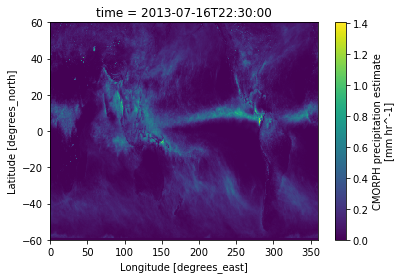

In [12]:
ds2013.cmorph_precip.plot()

In [13]:
lons, lats = np.meshgrid(lons, lats)

In [14]:
precip2013[0,:,:]

<xarray.DataArray 'cmorph_precip' (lat: 480, lon: 1440)>
[691200 values with dtype=float32]
Coordinates:
  * lon      (lon) float32 0.125 0.375 0.625 0.875 ... 359.375 359.625 359.875
  * lat      (lat) float32 59.875 59.625 59.375 ... -59.375 -59.625 -59.875
    time     datetime64[ns] 2013-07-16T22:30:00
Attributes:
    long_name:      CMORPH precipitation estimate
    standard_name:  lwe_precipitation_rate
    units:          mm hr^-1
    cell_methods:   time: mean

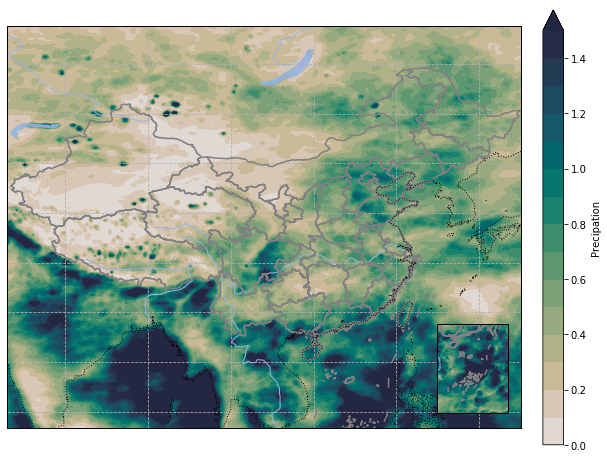

In [16]:
#grid contour
fig, ax= plotMap_contour(lats,lons,precip2013[0,:,:]*3,"2013-3h")